<a href="https://colab.research.google.com/github/boothmanrylan/eeek/blob/main/plot_sinusoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ee
import geemap
import ipywidgets

In [3]:
geemap.ee_initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=1JQxdHr7-TUnf3F_nHoDoKIfMImKzxF2V995jJlU2No&tc=oiimG10rQV1xkwQigDXf4GxaJoAQtBwGyDbfMR2Jxfc&cc=zeAWacWdV8V-sHPM5Ht5p-P5rL_eJInNZ2Fm-6_OE6o

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXnJ5EUBLZbMEQoeyDLi4-HRM9KCRGMXpVQUp8c37TXSYoEoo-NzpcA

Successfully saved authorization token.


In [4]:
!git clone https://github.com/boothmanrylan/eeek.git
%cd eeek

Cloning into 'eeek'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 132 (delta 80), reused 110 (delta 58), pack-reused 0
Receiving objects: 100% (132/132), 32.14 KiB | 567.00 KiB/s, done.
Resolving deltas: 100% (80/80), done.
/content/eeek


In [5]:
from eeek import utils, bulc, constants, ccdc_utils, vis_utils
from eeek.kalman_filter import kalman_filter

In [6]:
target_image = ee.Image("users/parevalo_bu/ccdc_long")
segments = ["S" + str(x) for x in range(1, 11)]
bands = ["SWIR1"]
target_coefs = ccdc_utils.get_ccdc_coefs(target_image, segments, bands, 2022, None).rename(ccdc_utils.HARMONIC_TAGS)

jeffs = ee.Image("users/boothmanrylan/kalman_filter/jeffs_constant_kalman_result")
cloud_score = ee.Image("users/boothmanrylan/kalman_filter/cloud_score_kalman_result")
bulc = ee.Image("users/boothmanrylan/kalman_filter/bulc_as_noise_kalman_result")
bulc_cloud_score = ee.Image("users/boothmanrylan/kalman_filter/bulc_plus_cloud_score_kalman_result")

vis = {
    "bands": ["INTP"],
    "min": 0,
    "max": 0.3
}

Map = geemap.Map()
Map.centerObject(target_image, 11)
Map.add_basemap('Esri.WorldImagery')
Map.addLayer(target_coefs, vis, "ccdc coefs")
Map.addLayer(jeffs.arrayFlatten([ccdc_utils.HARMONIC_TAGS]), vis, "jeffs constant")
Map.addLayer(cloud_score.arrayFlatten([ccdc_utils.HARMONIC_TAGS]), vis, "cloud score")
Map.addLayer(bulc.arrayFlatten([ccdc_utils.HARMONIC_TAGS]), vis, "bulc")
Map.addLayer(bulc_cloud_score.arrayFlatten([ccdc_utils.HARMONIC_TAGS]), vis, "bulc cloud score")

output = ipywidgets.Output()
vis_utils.CoefInspector(Map, output, ["ccdc coefs", "jeffs constant", "cloud score", "bulc", "bulc cloud score"])

CoefInspector()

Map(bottom=4438639.0, center=[-10.415011126061787, -64.4520664215088], controls=(WidgetControl(options=['posit…

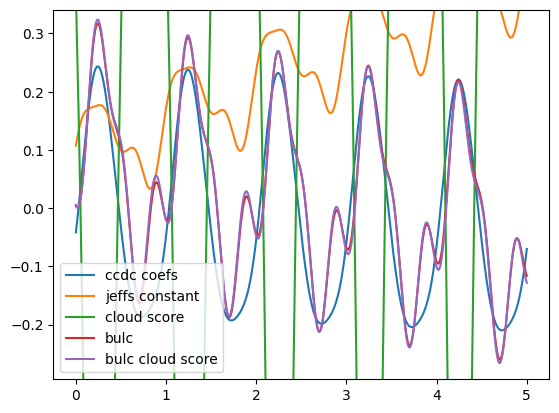

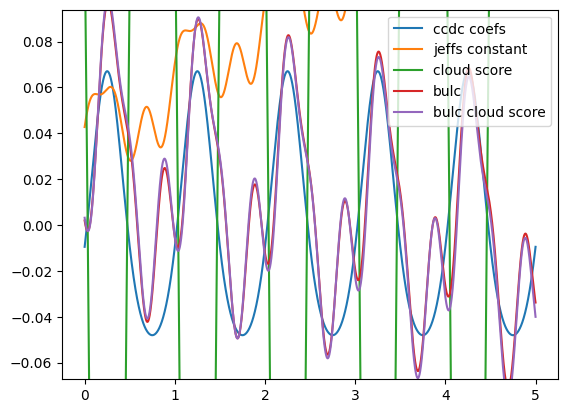

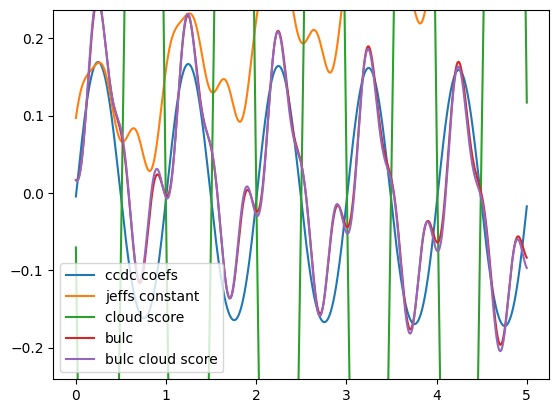

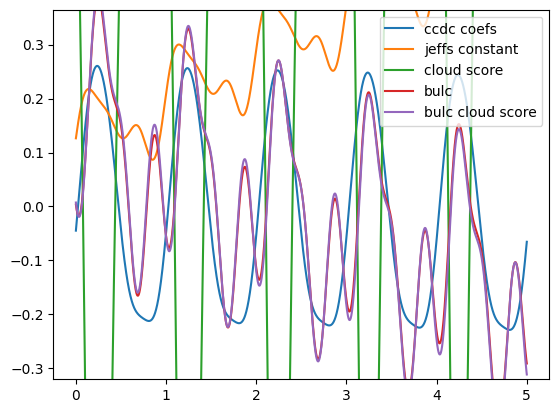

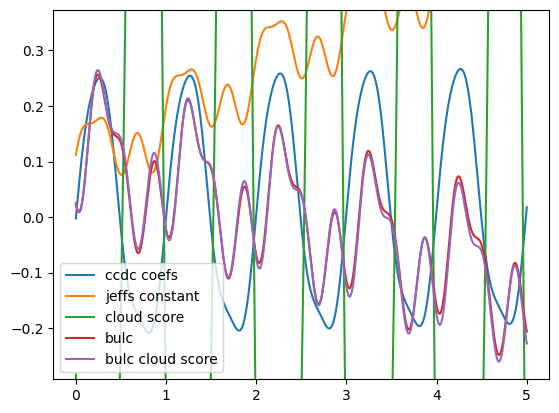

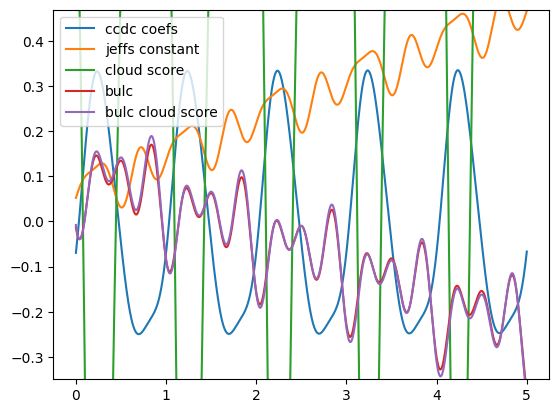

In [13]:
Map

In [8]:
output

Output()